In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

In [8]:
# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

In [10]:
# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [12]:
# Print the shape of the data
print(f'Training data shape: {x_train.shape}')
print(f'Testing data shape: {x_test.shape}')

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [14]:
# Add random noise to the images
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [16]:
# Clip the images to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.0)
x_test_noisy = np.clip(x_test_noisy, 0., 1.0)

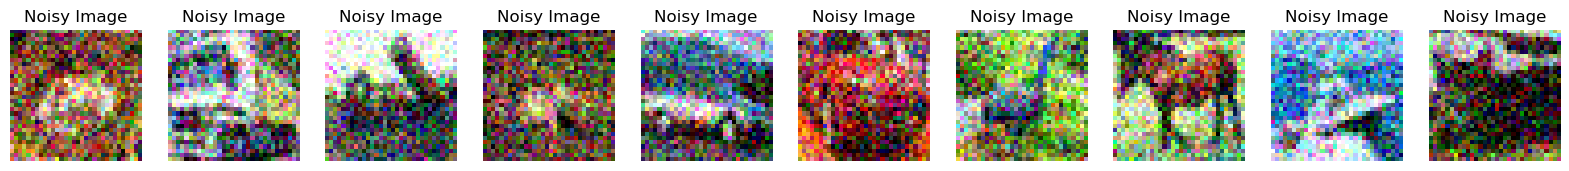

In [18]:
# Display some noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i])
    plt.title("Noisy Image")
    plt.axis('off')
plt.show()

In [20]:
# Build the autoencoder model
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)

In [22]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [24]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train, epochs=25, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - loss: 0.5945 - val_loss: 0.5688
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 0.5676 - val_loss: 0.5660
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 0.5653 - val_loss: 0.5658
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - loss: 0.5639 - val_loss: 0.5641
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - loss: 0.5631 - val_loss: 0.5635
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - loss: 0.5631 - val_loss: 0.5631
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - loss: 0.5629 - val_loss: 0.5631
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - loss: 0.5620 - val_loss: 0.5624
Epoch 9/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - loss: 0.5616 - val_loss: 0.5623
Epoch 10/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - loss: 0.5615 - val_loss: 0.5621
Epoch 11/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - loss: 0.5605 - val_loss: 0.5617
Epoch 12/25
391/391 ━━━━━━━━━━

In [27]:
# Evaluate and visualize the results
denoised_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


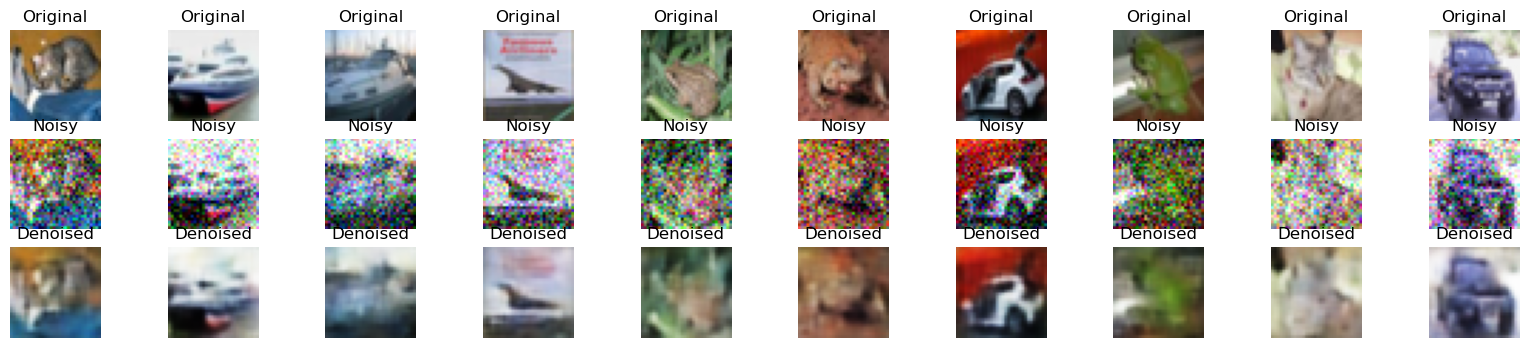

In [28]:
# Visualize the original noisy and denoised images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(denoised_imgs[i])
    plt.title("Denoised")
    plt.axis('off')
plt.show()